In [24]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv("Datasets\WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv\WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

## Create the data subsets

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [27]:
# Split the dataset by Number of Policies
policies = df['Number of Policies'].unique()

subsets = {}

for policy in policies:
    subsets[policy] = df[df['Number of Policies'] == policy]

In [28]:
# From the subsets dict we create individual datasets
df_1 = subsets[1]
df_2 = subsets[2]
df_3 = subsets[3]
df_4 = subsets[4]
df_5 = subsets[5]
df_6 = subsets[6]
df_7 = subsets[7]
df_8 = subsets[8]
df_9 = subsets[9]

### Explore customers with 1 policy

In [29]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3251 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       3251 non-null   object 
 1   State                          3251 non-null   object 
 2   Customer Lifetime Value        3251 non-null   float64
 3   Response                       3251 non-null   object 
 4   Coverage                       3251 non-null   object 
 5   Education                      3251 non-null   object 
 6   Effective To Date              3251 non-null   object 
 7   EmploymentStatus               3251 non-null   object 
 8   Gender                         3251 non-null   object 
 9   Income                         3251 non-null   int64  
 10  Location Code                  3251 non-null   object 
 11  Marital Status                 3251 non-null   object 
 12  Monthly Premium Auto           3251 non-null   int64 

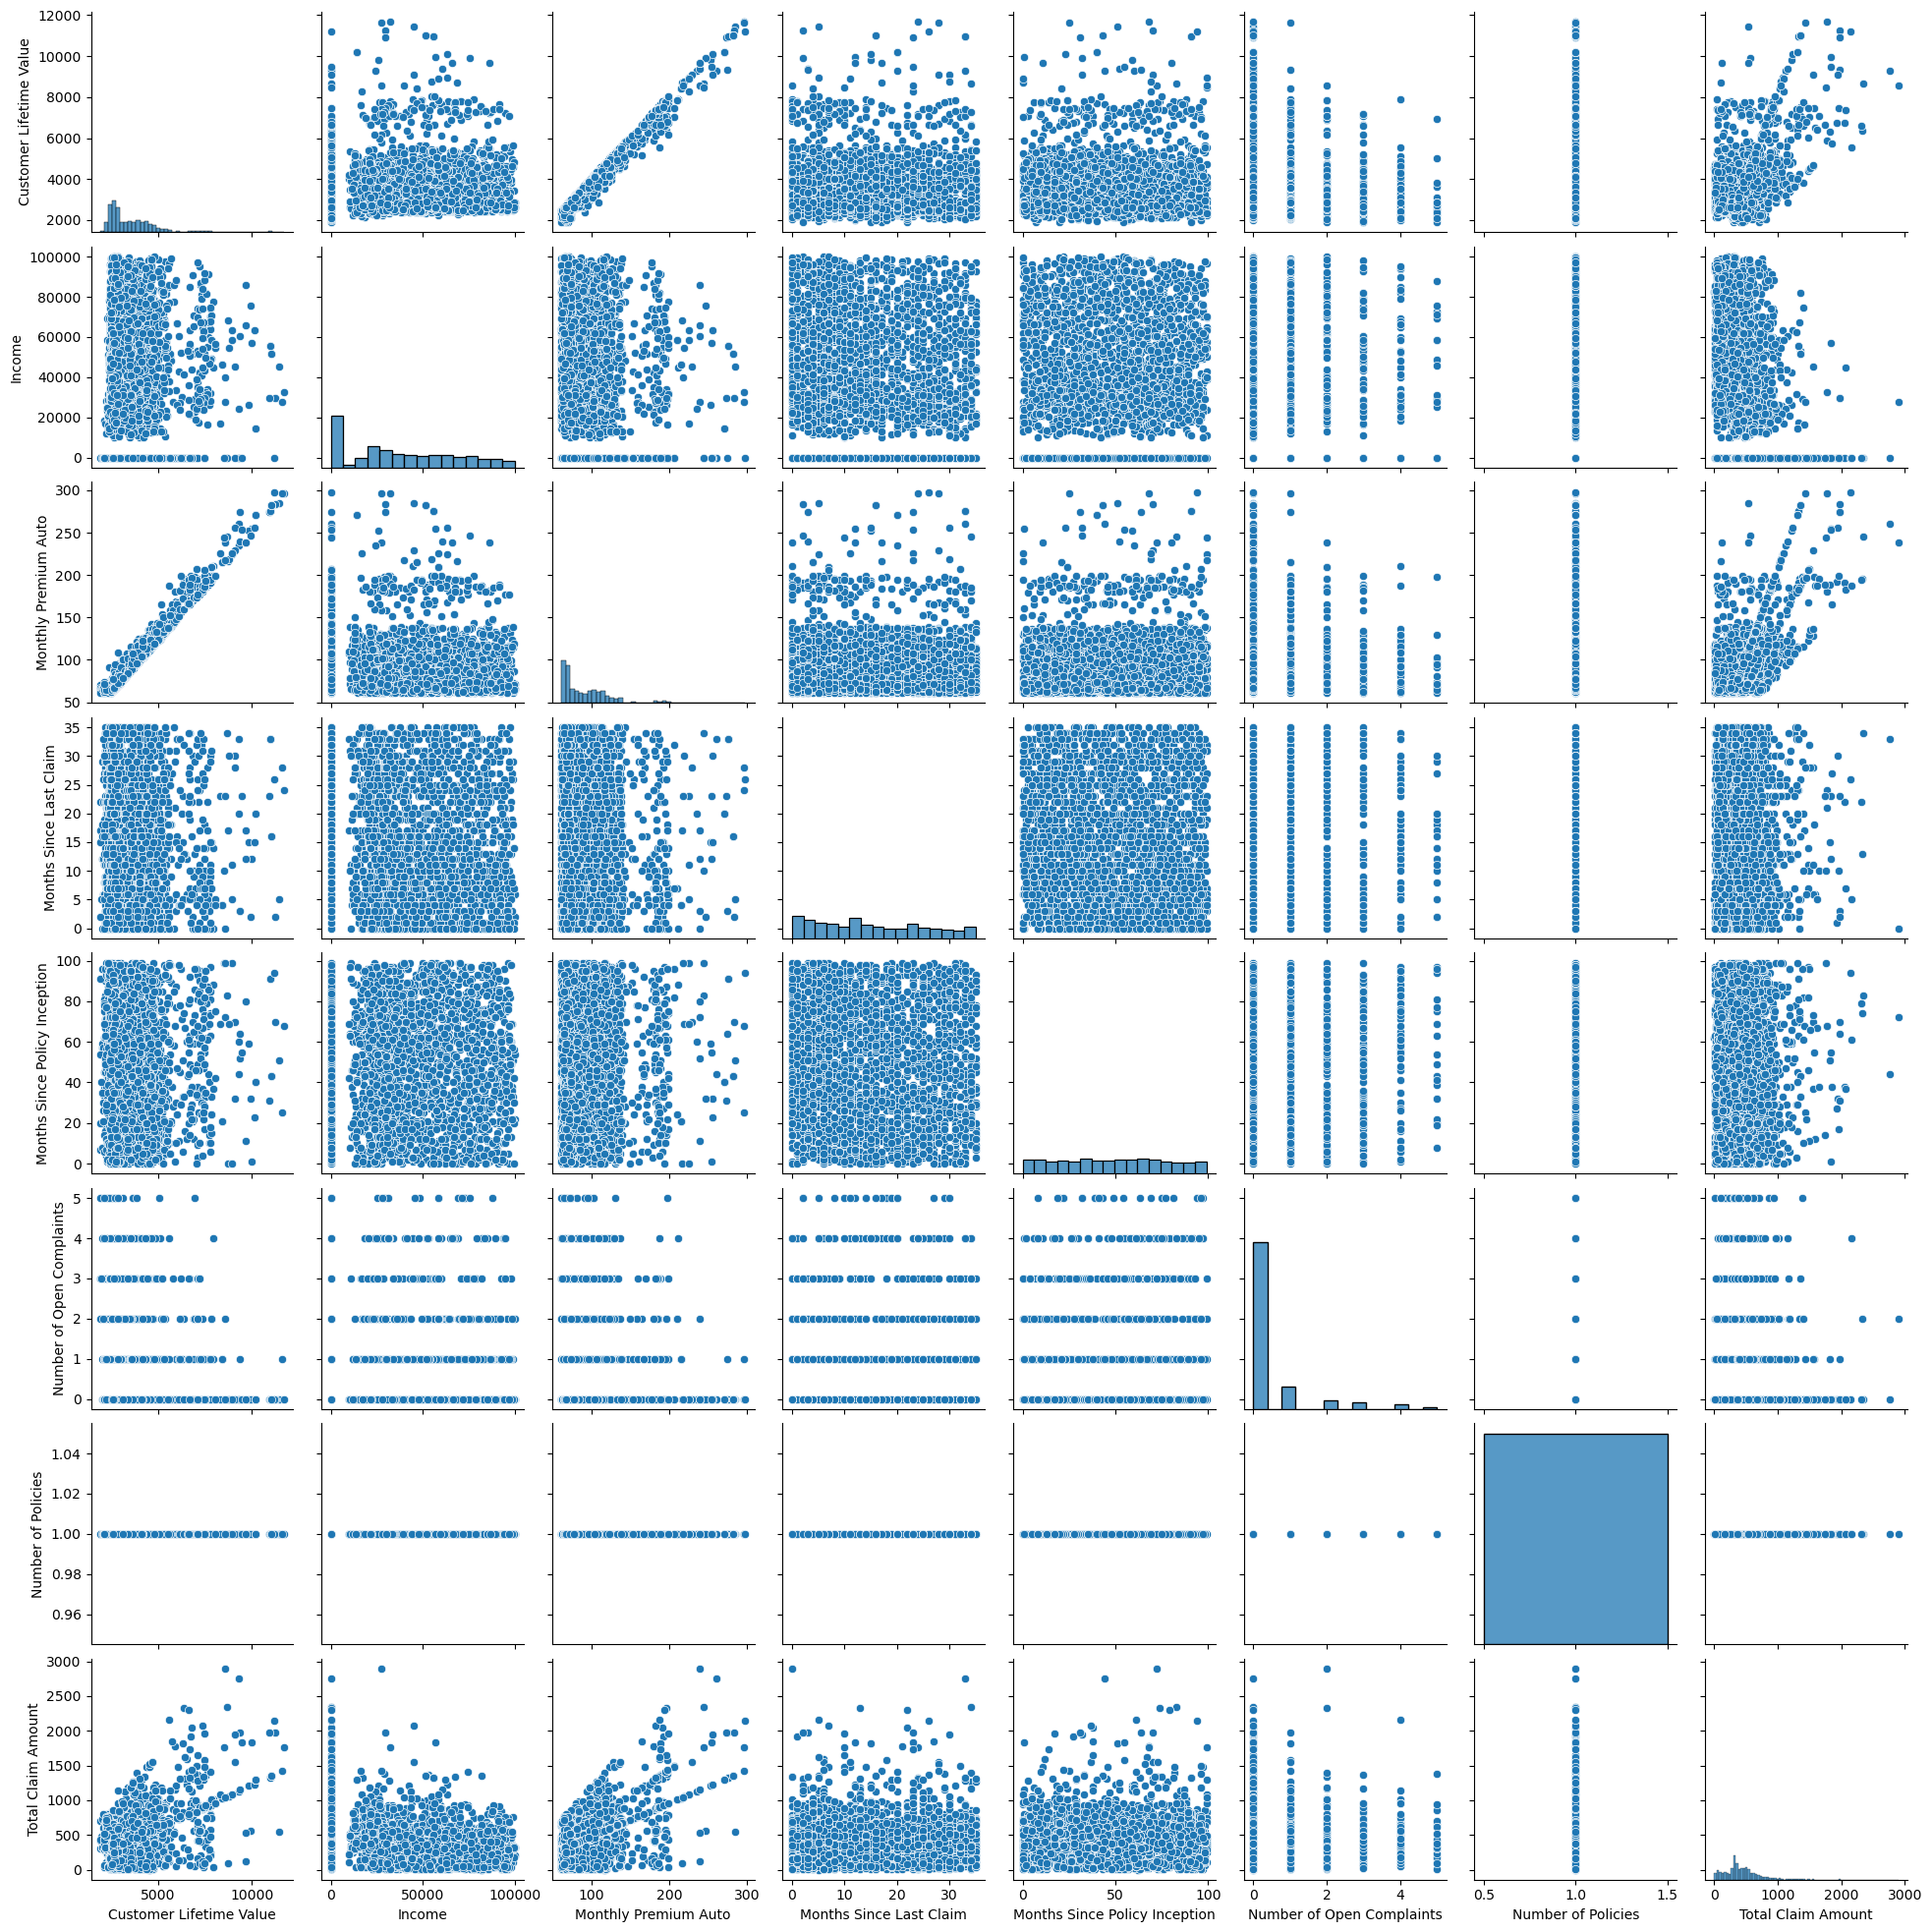

In [30]:
# View correlations between numeric features
sns.pairplot(df_1)

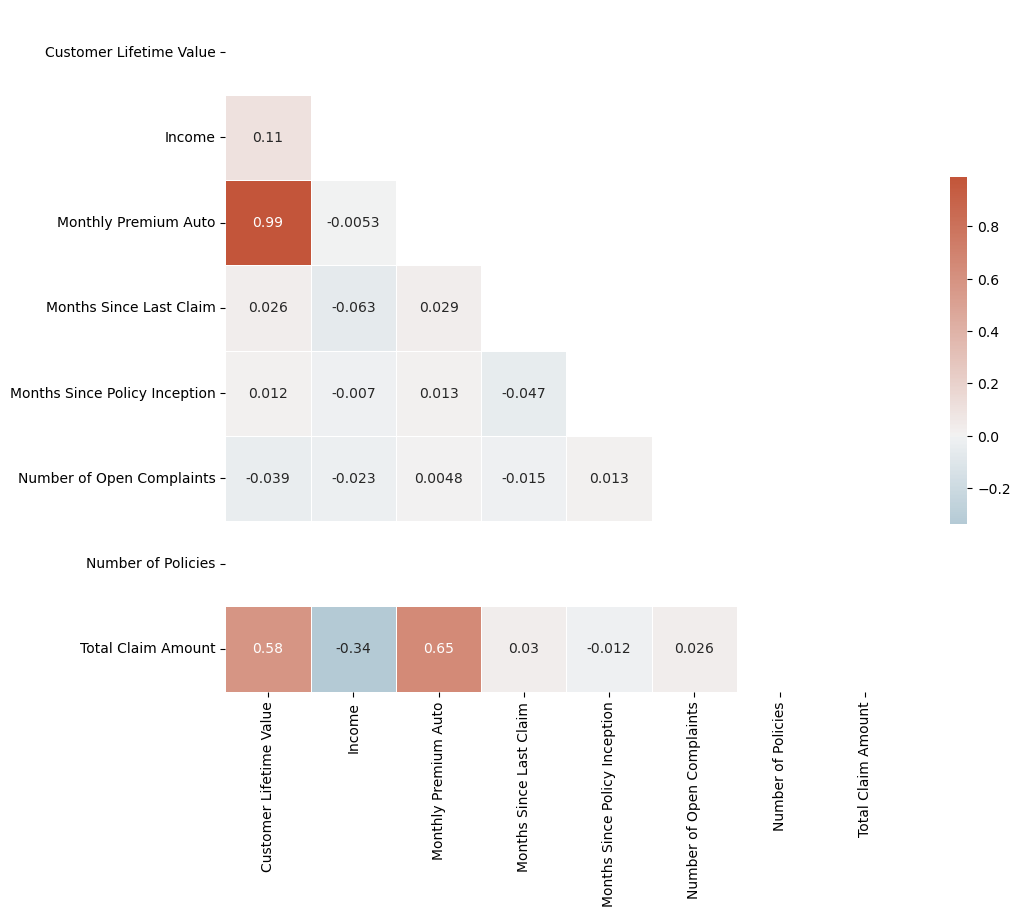

In [31]:
# Plot a heatmap of the correlations
corr = df_1.select_dtypes(include=['float', 'int']).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

plt.show()

There is almost perfect correlation between Customer Lifetime Value and Monthly Premium Auto. 

We can see that there is very little negative correlation between the numeric features. 

In [32]:
# Let's explore the relationship between Customer Lifeitme Value and Monthly Premium Auto
df_1_cvm = df_1[["Customer Lifetime Value", "Monthly Premium Auto"]]
df_1_cvm['Multiplier'] = df_1_cvm['Customer Lifetime Value'] / df_1_cvm['Monthly Premium Auto']

df_1_cvm

C:\Users\zive9\AppData\Local\Temp\ipykernel_6988\2387274874.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_cvm['Multiplier'] = df_1_cvm['Customer Lifetime Value'] / df_1_cvm['Monthly Premium Auto']


,Customer Lifetime Value,Monthly Premium Auto,Multiplier
0,2763.519279,69,40.051004
4,2813.692575,73,38.543734
16,2566.867823,67,38.311460
17,3945.241604,101,39.061798
20,2872.051273,74,38.811504
...,...,...,...
9120,2114.738469,72,29.371368
9121,4140.648654,123,33.663810
9128,4100.398533,104,39.426909
9130,3096.511217,79,39.196345


In [33]:
df_1_cvm['Multiplier'].mean()

38.280595880865725

In [34]:
38/12

3.1666666666666665

### Explore customers with 2 policies

In [11]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2294 entries, 2 to 9131
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       2294 non-null   object 
 1   State                          2294 non-null   object 
 2   Customer Lifetime Value        2294 non-null   float64
 3   Response                       2294 non-null   object 
 4   Coverage                       2294 non-null   object 
 5   Education                      2294 non-null   object 
 6   Effective To Date              2294 non-null   object 
 7   EmploymentStatus               2294 non-null   object 
 8   Gender                         2294 non-null   object 
 9   Income                         2294 non-null   int64  
 10  Location Code                  2294 non-null   object 
 11  Marital Status                 2294 non-null   object 
 12  Monthly Premium Auto           2294 non-null   int64 

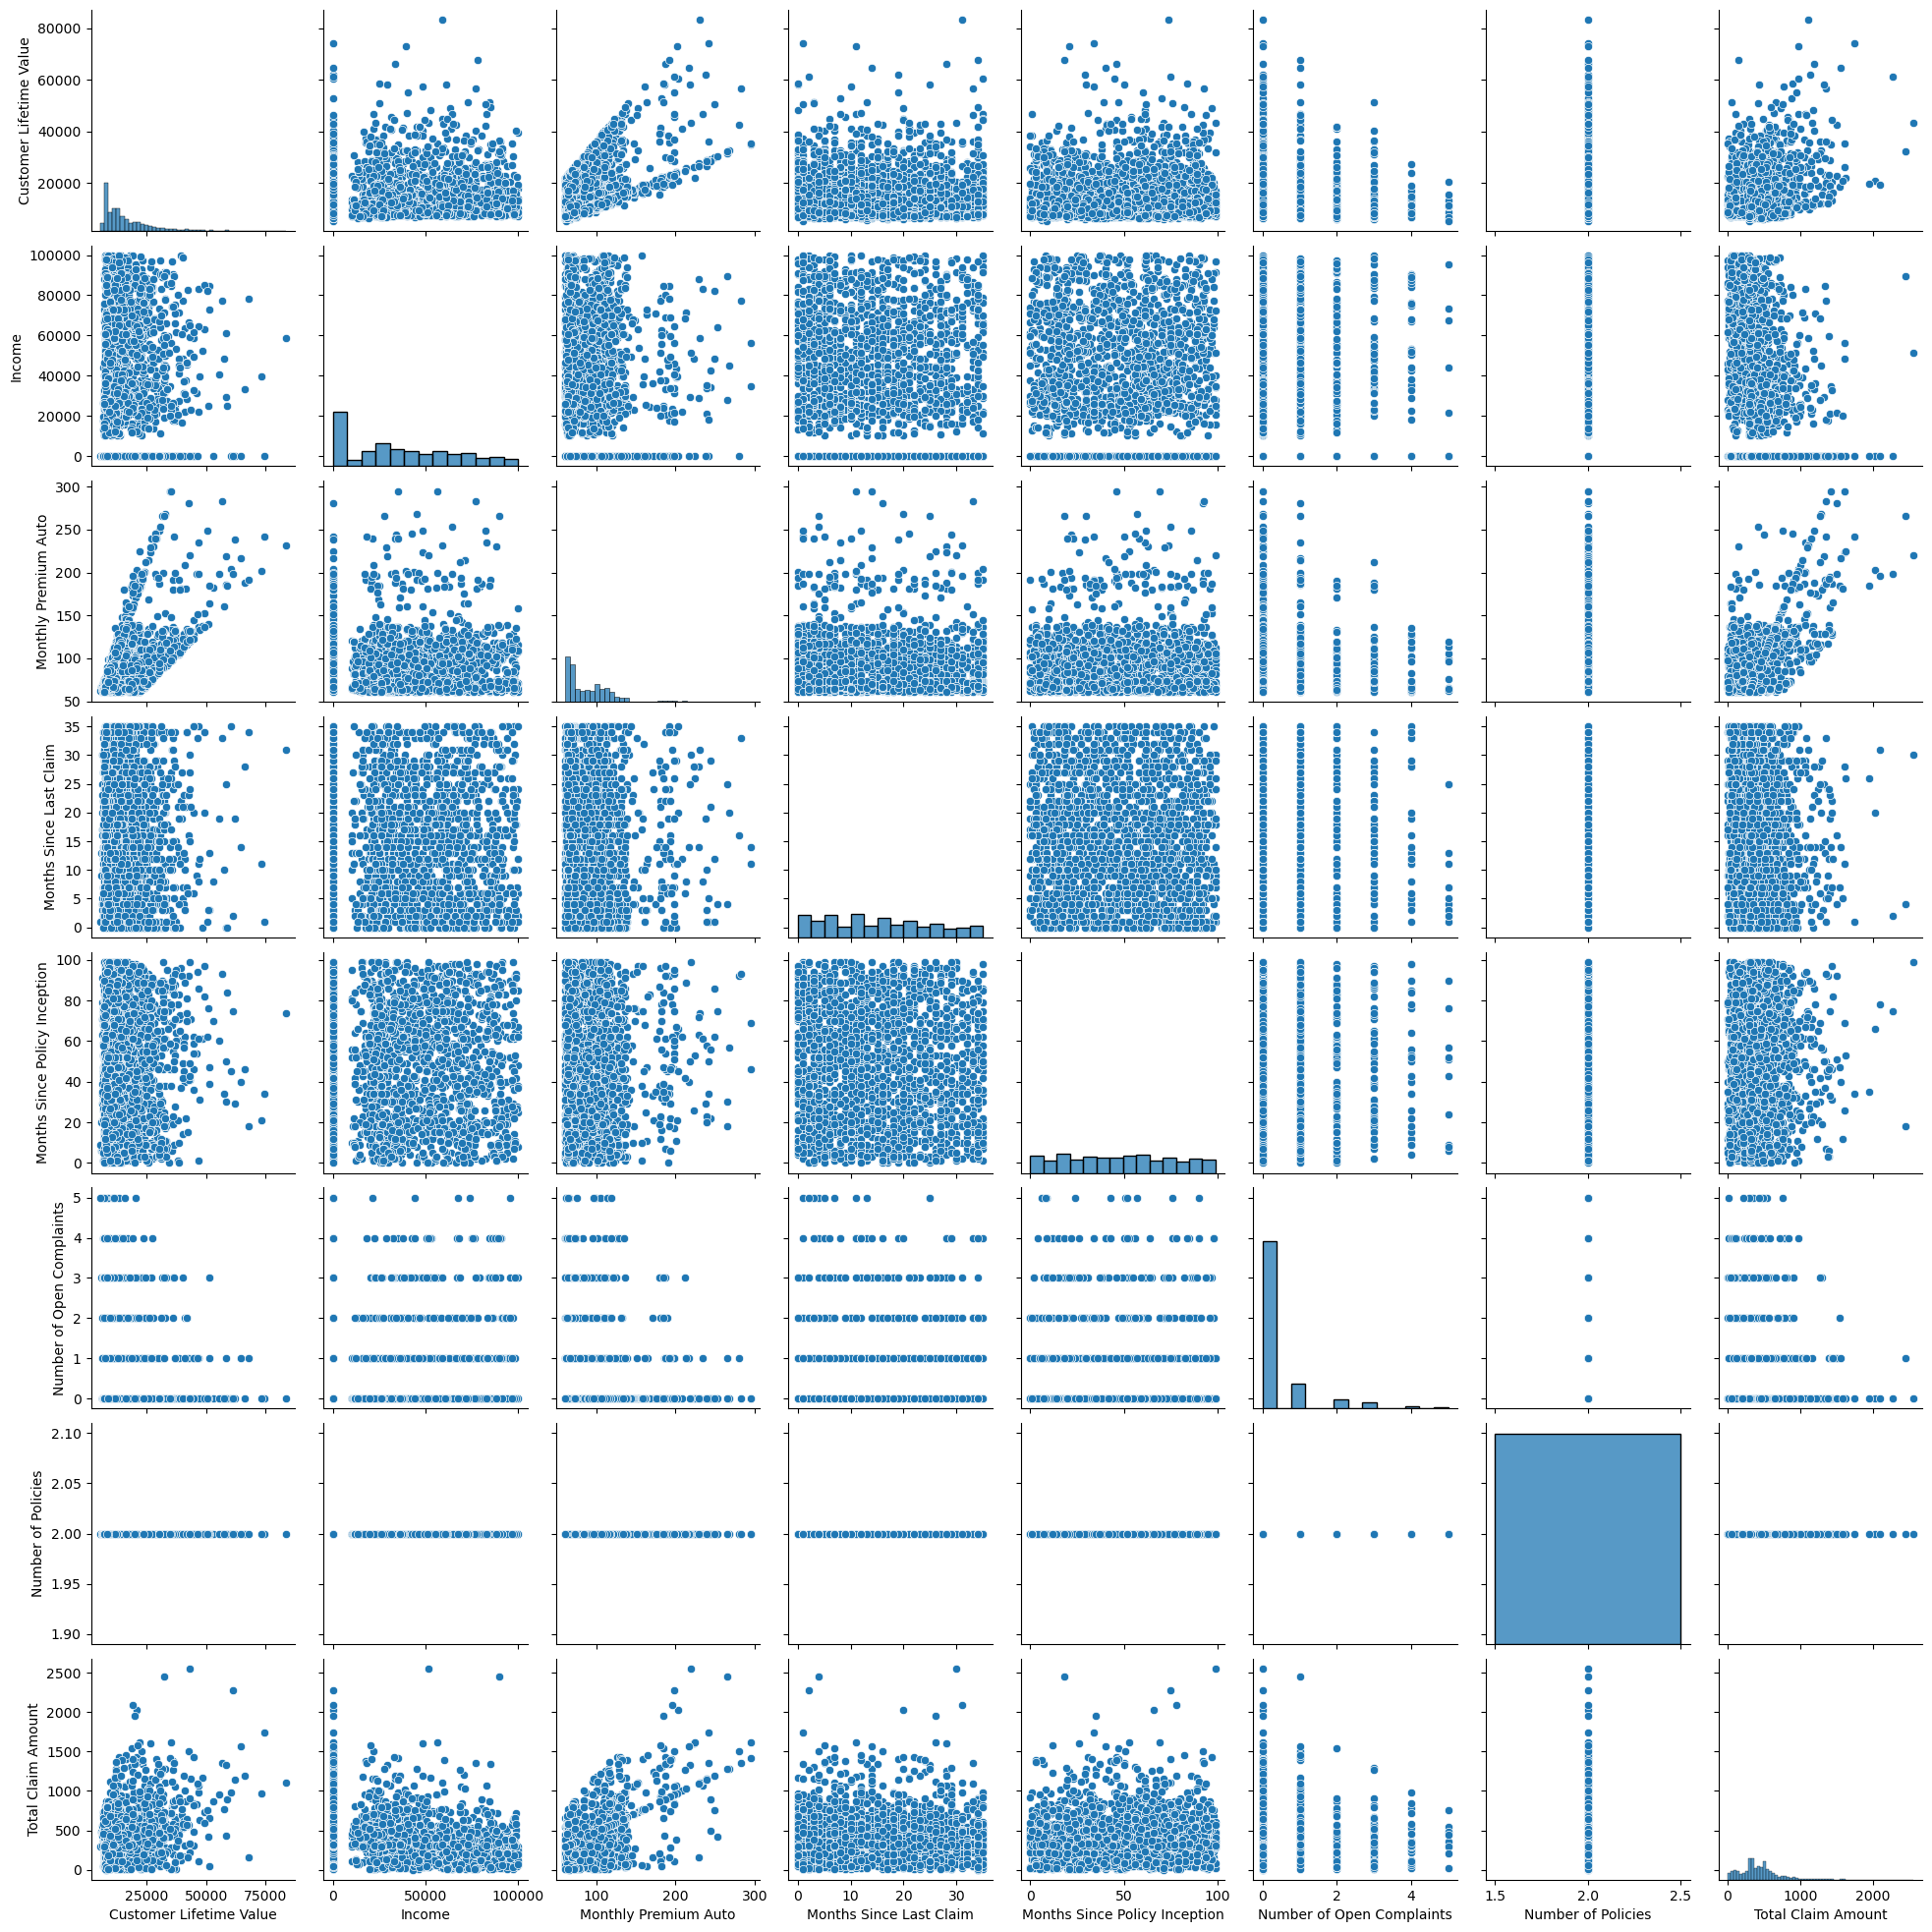

In [12]:
sns.pairplot(df_2)